# Medicaid Expenditure Forecasting

## Data Collection and Cleaning

In [1]:
import pandas as pd
import prophet

#### State-wise Data

In [2]:

exp_22 = pd.read_excel('fy2022-statistical-chart.xlsx').set_index('MFCU Statistical Data for FY 2022').iloc[3:,15].reset_index()
exp_22.columns = ['state','exp_22']

exp_21 = pd.read_excel('fy2021-statistical-chart.xlsx').set_index('MFCU Statistical Data for FY 2021').iloc[3:,15].reset_index()
exp_21.columns = ['state','exp_21']

exp = pd.merge(exp_22,exp_21, on = "state")

exp_20 = pd.read_excel('fy2020-statistical-chart.xlsx').set_index('MFCU Statistical Data for FY 2020').iloc[3:,15].reset_index()
exp_20.columns = ['state','exp_20']

exp = pd.merge(exp,exp_20, on = "state")

exp_19 = pd.read_excel('fy2019-statistical-chart.xlsx').set_index('MFCU Statistical Data for FY 2019').iloc[3:,15].reset_index()
exp_19.columns = ['state','exp_19']

exp = pd.merge(exp,exp_19,how = 'outer', on = "state")

exp_18 = pd.read_excel('fy2018-statistical-chart.xlsx').set_index('MFCU Statistical Data for FY 2018').iloc[3:,15].reset_index()
exp_18.columns = ['state','exp_18']

exp = pd.merge(exp,exp_18,how = 'outer', on = "state")

exp_17 = pd.read_excel('fy2017-statistical-chart.xlsx').set_index('MFCU Statistical Data for FY 2017').iloc[3:,15].reset_index()
exp_17.columns = ['state','exp_17']
exp_17['state'] = exp_17['state'].str.title().replace('Grand Total','GRAND TOTAL')

exp = pd.merge(exp,exp_17,how = 'outer', on = "state")

exp_16 = pd.read_excel('fy2016-statistical-chart.xlsx').set_index('MFCU Statistical Data for Fiscal Year 2016').iloc[5:, 16].reset_index()
exp_16.columns = ['state','exp_16']
exp_16['state'] = exp_16['state'].str.title().replace('Grand Total','GRAND TOTAL')

exp = pd.merge(exp,exp_16,how = 'outer', on = "state")

exp_15 = pd.read_excel('fy2015-statistical-chart.xlsx').set_index('MFCU Statistical Data for Fiscal Year 2015').iloc[3:54,16].reset_index()
exp_15.columns = ['state','exp_15']
exp_15['state'] = exp_15['state'].str.title().replace('Grand Total','GRAND TOTAL')

exp = pd.merge(exp,exp_15,how = 'outer', on = "state")

exp_14 = pd.read_excel('fy2014-statistical-chart.xlsx').set_index('MFCU STATISTICAL DATA FOR FISCAL YEAR 2014').iloc[4:,-2].reset_index()
exp_14.columns = ['state','exp_14']
exp_14['exp_14'] = exp_14['exp_14'].astype(int)
exp_14['state'] = exp_14['state'].str.title().replace('Grand Total','GRAND TOTAL')

exp = pd.merge(exp,exp_14,how = 'outer', on = "state")

exp_13 = pd.read_excel('fy2013-statistical-chart.xlsx').set_index('MFCU STATISTICAL DATA FOR FISCAL YEAR 2013').iloc[4:,-2].reset_index()
exp_13.columns = ['state','exp_13']
exp_13['exp_13'] = exp_13['exp_13'].astype(int)
exp_13['state'] = exp_13['state'].str.title().replace('Grand Total','GRAND TOTAL')

exp = pd.merge(exp,exp_13,how = 'left', on = "state")
#the column "New Hampshire" does not match due to some errorl. Manually input the value here.
exp.iloc[29,10] = exp_13.iloc[29,1]

exp_12 = pd.read_excel('fy2012-statistical-chart.xlsx').set_index('MFCU STATISTICAL DATA FOR FISCAL YEAR 2012').iloc[4:,-2].reset_index()
exp_12.columns = ['state','exp_12']
exp_12['state'] = exp_12['state'].str.title().replace('Grand Total','GRAND TOTAL')

exp = pd.merge(exp,exp_12,how = 'left', on = "state")
exp.iloc[29,11] = exp_12.iloc[29,1]


exp_11 = pd.read_excel('fy2011-statistical-chart.xlsx').set_index('MFCU STATISTICAL DATA FOR FISCAL YEAR 2011').iloc[5:,-2].reset_index()
exp_11.columns = ['state','exp_11']
exp_11['state'] = exp_11['state'].str.title()
exp_11['state'] = exp_11['state'].str.title().replace('Grand Total','GRAND TOTAL').replace('N. Carolina','North Carolina').replace('S. Carolina','South Carolina')

exp = pd.merge(exp,exp_11,how = 'outer', on = "state")

exp_10 = pd.read_excel('fy2010-statistical-chart.xlsx').set_index('MFCU STATISTICAL DATA FOR FISCAL YEAR 2010').iloc[5:,-2].reset_index()
exp_10.columns = ['state','exp_10']
exp_10['state'] = exp_10['state'].str.title()
exp_10['state'] = exp_10['state'].str.title().replace('Grand Total','GRAND TOTAL').replace('N. Carolina','North Carolina').replace('S. Carolina','South Carolina')

exp = pd.merge(exp,exp_10,how = 'inner', on = "state")

In [3]:
exp = exp.transpose()
exp.reset_index(inplace = True)

#set headers
header = exp.iloc[0]
exp.columns = header
exp = exp.iloc[1:]

#create a new column to indicate the year as new index
exp['year'] = range(2022, 2009, -1)
exp.reset_index(inplace = True, drop = True)
exp.set_index('year',inplace = True)
exp = exp.sort_values('year')
exp = exp.drop('state',axis = 1)


In [4]:
exp

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,D.C.,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,GRAND TOTAL
year,,,,,,,,,,,,,,,,,,,,,
2010,3421114860.0,1303167967.0,9530252173.0,4071188715.0,45534894107.0,4193565063.0,5674344698.0,1344238216.0,1900221965.0,17876647141.0,...,8794824452.0,27431054659.0,1805360283.0,1253797637.0,6661344614.0,7487639726.0,2650115175.0,6719603555.0,569686342.0,397904220400.0
2011,5014342056.0,1395772331.0,9144221763.0,4152998259.0,58552742935.0,4534729952.0,5999527969.0,1469063089.0,2236218224.0,18764932974.0,...,8383620528.0,29095249571.0,1854111517.0,1296208676.0,7128885432.0,6146426452.0,2864116278.0,7219658809.0,564888226.0,423078663904.0
2012,5202250299.0,1440666465.0,8166873215.0,4361914879.0,53270170958.0,4899709037.0,6696144656.0,1572781439.0,2224371999.0,18768442553.0,...,9250214571.0,28933778885.0,2003210278.0,1362246455.0,7089248466.0,8119798373.0,2930833693.0,7464081821.0,566129475.0,428539959340.0
2013,5216155508.0,1446189444.0,8669976278.0,4428390909.0,66056757855.0,5314867064.0,6723113621.0,1655387071.0,2397083097.0,19180703866.0,...,9022143146.0,29086162849.0,2229362038.0,1499744254.0,7604993529.0,8407111070.0,3181083472.0,7390660088.0,594690624.0,453082711064.0
2014,5454050260.0,1546569264.0,9452683998.0,5154278818.0,68248444914.0,6265152763.0,7167946629.0,1805108123.0,2524458778.0,20818233200.0,...,9654242145.0,32831310090.0,2234539587.0,1570053514.0,7980183305.0,7522374478.0,3488266696.0,7783215463.0,594519949.0,488240409971.0
2015,5495672054,1223950911,10895032291,5852914637,90614357683,7687605872,7597012987,2023509108,2520735076,21909678011,...,9506550239,36147676703,2300014634,1666066978,8510779754,11074882616,3835749849,8212122596,621092843,548190828914
2016,5657488854,1929110081,11343767402,6337245143,86608583280,8289970721,7790671895,2003364878,2935002292,22457578621,...,9928469426,41068187142,2251931573,1768236337,8927198595,11458035943,3813616346,8026421926,637273743,571229555606
2017,5799830460,2083665781,12100681031,6763173651,88664592580,8186563706,7820846438,2260921363,2960762273,23922618501,...,9661478672,37152558007,2589750289,1742676601,9458031224,12606903927,4157807522,8503112507,648699099,596434360108
2018,5768025506,2196000353,12406620828,6709044022,88895768297,9337178911,8570841507,2327046971,2976558441,23747162235,...,10301164426,38962764740,2578963871,1769804444,9934971320,12827331385,3996923158,9180255127,669181828,611976826895


#### Data for total expenditure from 1970

In [56]:
data = pd.read_csv('medicaid_spending_usafacts.csv')
data = pd.DataFrame(data.iloc[0])
header = data.iloc[0]
data.columns = header
data = data.iloc[1:]
data['Medicaid spending ($)'] = data['Medicaid spending ($)'].astype(float)
# data

In [57]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=[10,5])
# plt.plot(data.index, data['Medicaid spending ($)'])
# plt.xticks(rotation = 45)
# plt.show()

## Forecasting for Total Expenditure

In [58]:
data = data.reset_index()
data.columns = ['ds','y']
data['ds'] = pd.to_datetime(data['ds'].astype(str) + '-01-01')
data = data.set_index('ds')
data = data.resample('MS').interpolate(method='spline',order = 2)
data = data.reset_index()

In [118]:
data

,ds,y
0,1970-01-01,5.092223e+09
1,1970-02-01,5.214040e+09
2,1970-03-01,5.324284e+09
3,1970-04-01,5.446581e+09
4,1970-05-01,5.565171e+09
...,...,...
620,2021-09-01,7.974752e+11
621,2021-10-01,8.039299e+11
622,2021-11-01,8.106860e+11
623,2021-12-01,8.173077e+11


In [119]:
data.to_csv('1970-2022_expendture_monthly_interpolate.csv')

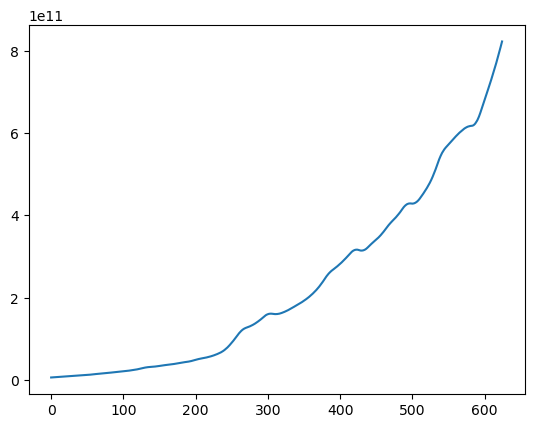

In [60]:
import matplotlib.pyplot as plt
plt.plot(data['y'])

In [105]:
train = data[data['ds']>'2004-12-31']
train

,ds,y
420,2005-01-01,3.158694e+11
421,2005-02-01,3.164063e+11
422,2005-03-01,3.166884e+11
423,2005-04-01,3.167762e+11
424,2005-05-01,3.166364e+11
...,...,...
620,2021-09-01,7.974752e+11
621,2021-10-01,8.039299e+11
622,2021-11-01,8.106860e+11
623,2021-12-01,8.173077e+11


#### Refit for the next-decade prediction

In [106]:
m = Prophet()
m.fit(train)

18:41:53 - cmdstanpy - INFO - Chain [1] start processing


18:41:54 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
future = m.make_future_dataframe(periods=10,freq='YS')
forecast = m.predict(future)
result = forecast[['ds','yhat']]

In [108]:
result[result['ds']>"2022-01-01"]

,ds,yhat
205,2023-01-01,8.713864e+11
206,2024-01-01,9.315809e+11
207,2025-01-01,9.933731e+11
208,2026-01-01,1.053575e+12
209,2027-01-01,1.113773e+12
210,2028-01-01,1.173967e+12
211,2029-01-01,1.235759e+12
212,2030-01-01,1.295961e+12
213,2031-01-01,1.356159e+12
214,2032-01-01,1.416353e+12


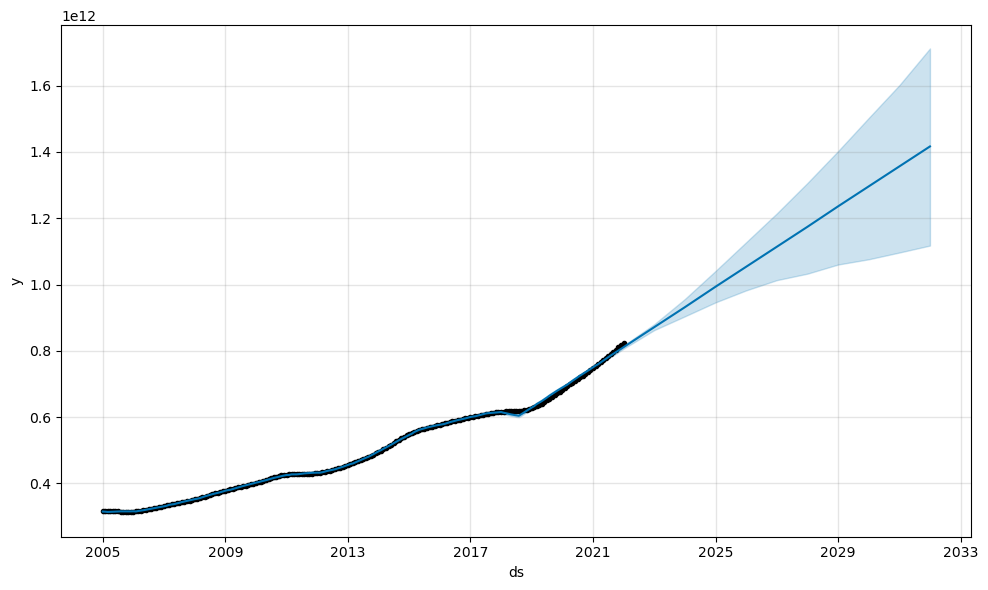

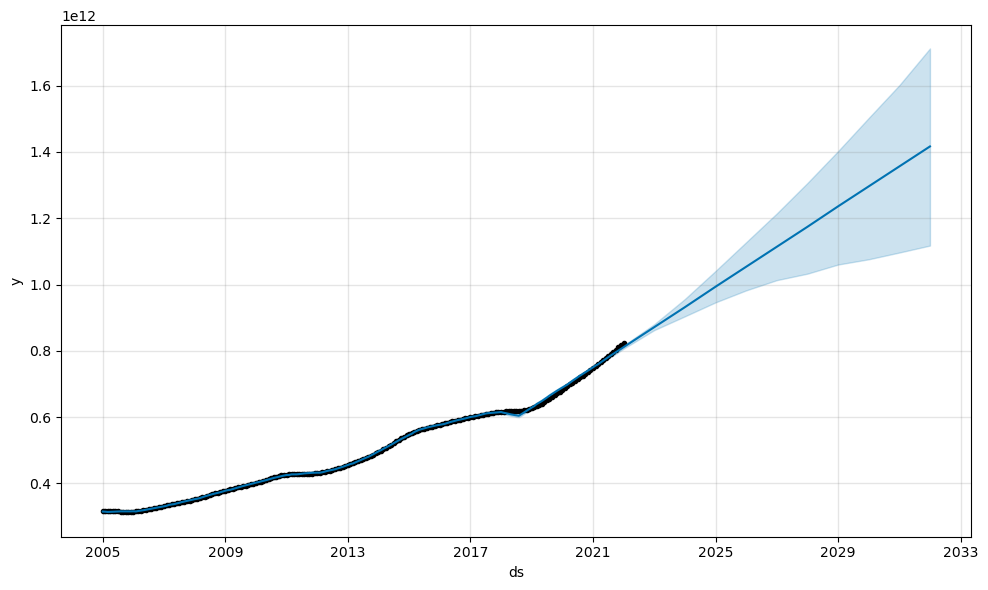

In [109]:
m.plot(forecast)

In [116]:
result[result['ds']>"2022-01-01"].to_csv('total_expenditure_forecast_result.csv')

In [115]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          215 non-null    datetime64[ns]
 1   trend                       215 non-null    float64       
 2   yhat_lower                  215 non-null    float64       
 3   yhat_upper                  215 non-null    float64       
 4   trend_lower                 215 non-null    float64       
 5   trend_upper                 215 non-null    float64       
 6   additive_terms              215 non-null    float64       
 7   additive_terms_lower        215 non-null    float64       
 8   additive_terms_upper        215 non-null    float64       
 9   yearly                      215 non-null    float64       
 10  yearly_lower                215 non-null    float64       
 11  yearly_upper                215 non-null    float64       

## For IL

In [12]:
il = exp[['Illinois']]
il

,Illinois
year,
2010,15891341974.0
2011,13514599822.0
2012,13997999869.0
2013,16536234179.0
2014,17726308920.0
2015,17963860929
2016,20172293337
2017,16064148838
2018,23112241735


In [13]:
il = il.reset_index()
il.columns = ['ds','y']
il['y'] = il['y'].astype(float)
il['ds'] = pd.to_datetime(il['ds'].astype(str) + '-01-01')
il = il.set_index('ds')
il = il.resample('D').interpolate(method='linear')
il = il.reset_index()
il

,ds,y
0,2010-01-01,1.589134e+10
1,2010-01-02,1.588483e+10
2,2010-01-03,1.587832e+10
3,2010-01-04,1.587181e+10
4,2010-01-05,1.586530e+10
...,...,...
4379,2021-12-28,2.698331e+10
4380,2021-12-29,2.698063e+10
4381,2021-12-30,2.697795e+10
4382,2021-12-31,2.697527e+10


In [14]:
from prophet import Prophet
m_il = Prophet()
m_il.fit(il)

future_il = m_il.make_future_dataframe(periods=10,freq='YS')
forecast_il = m_il.predict(future_il)
result_il = forecast_il[['ds','yhat']]

14:03:19 - cmdstanpy - INFO - Chain [1] start processing
14:03:20 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
result_il[result_il['ds']>"2022-01-01"]

,ds,yhat
4384,2023-01-01,3.154593e+10
4385,2024-01-01,3.414612e+10
4386,2025-01-01,3.676135e+10
4387,2026-01-01,3.936152e+10
4388,2027-01-01,4.196191e+10
4389,2028-01-01,4.456200e+10
4390,2029-01-01,4.718041e+10
4391,2030-01-01,4.978053e+10
4392,2031-01-01,5.238068e+10
4393,2032-01-01,5.498087e+10


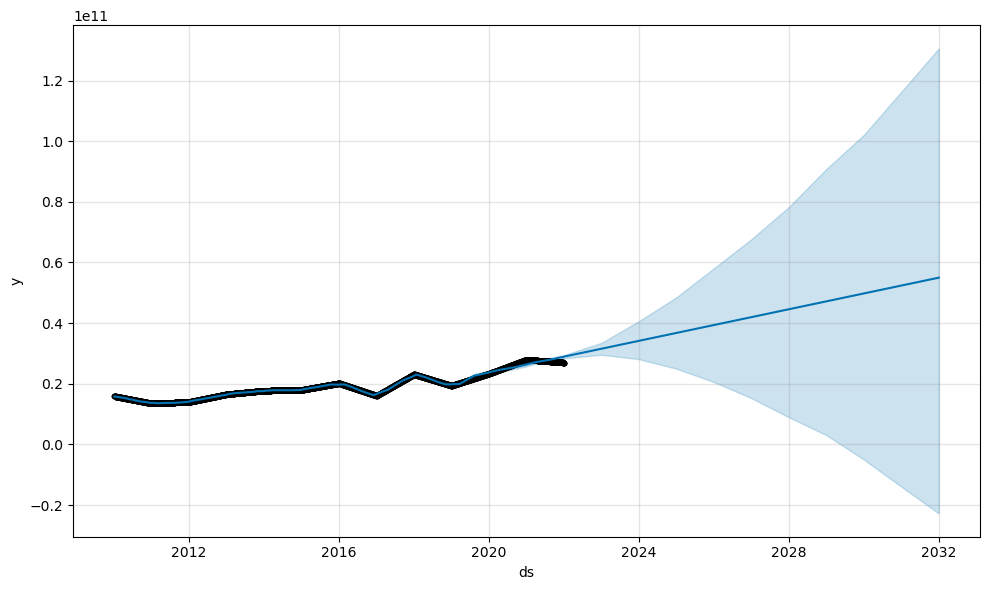

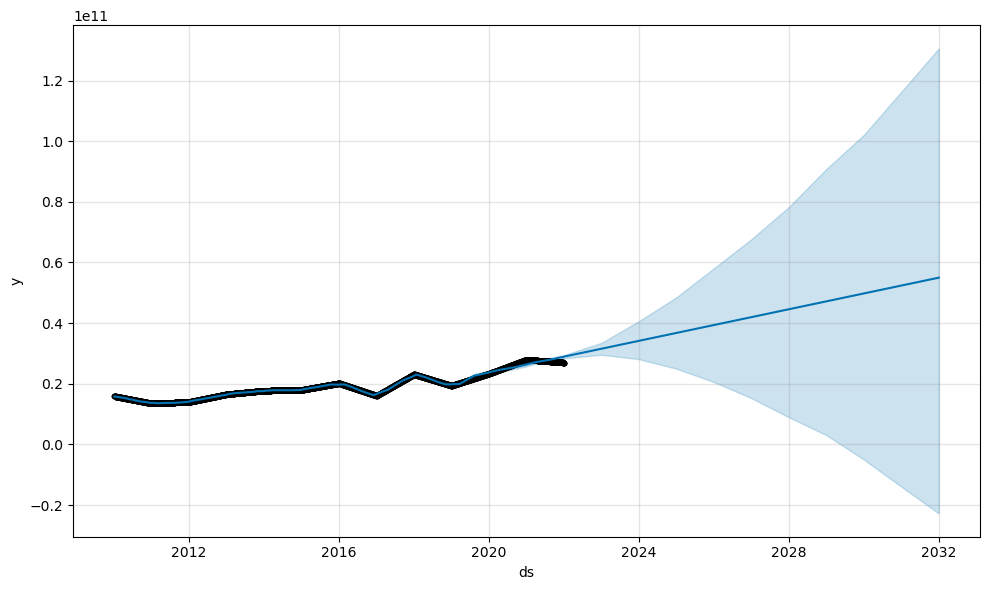

In [16]:
m_il.plot(forecast_il)

In [117]:
result_il[result_il['ds']>"2022-01-01"].to_csv('IL_expenditure_forecast_result.csv')